# Breast Cancer 
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Data Preprocessing</li>
<li>Building Model</li>
<li>Evaluating Model Performance</li>
</ul>

# Introduction

- My target in this project is to build an machine learning model to predict whether a tumor is malignant or benign.

# Importing The Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":[9,9]},font_scale=1.1)

# Reading The Data

In [3]:
df=pd.read_csv("data.csv")

# Data Inspection

In [4]:
#Displaying the first five records from the dataset
df.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0


In [ ]:
df.shape

(569, 35)

- No.of records  = 569
- No.of features = 35 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

- Unnamed: 32 is a feature contains only nans.

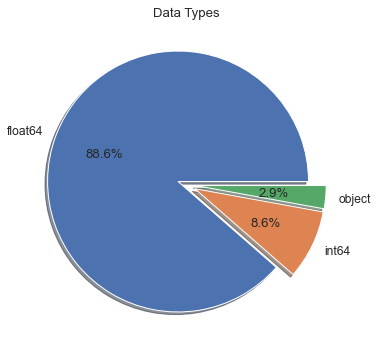

In [ ]:
plt.figure(figsize=[6,6])
df.dtypes.value_counts().plot.pie(shadow=True,explode=[0.07,0.07,0.07],autopct='%1.1f%%')
plt.title("Data Types")
plt.ylabel("")
plt.show()

- Most of the data are floats as it equals to 88.6% of the data.

In [ ]:
#Data description
df.describe()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,284.000000,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.627417
std,164.400426,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,0.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,142.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,284.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,1.000000
75%,426.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,568.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


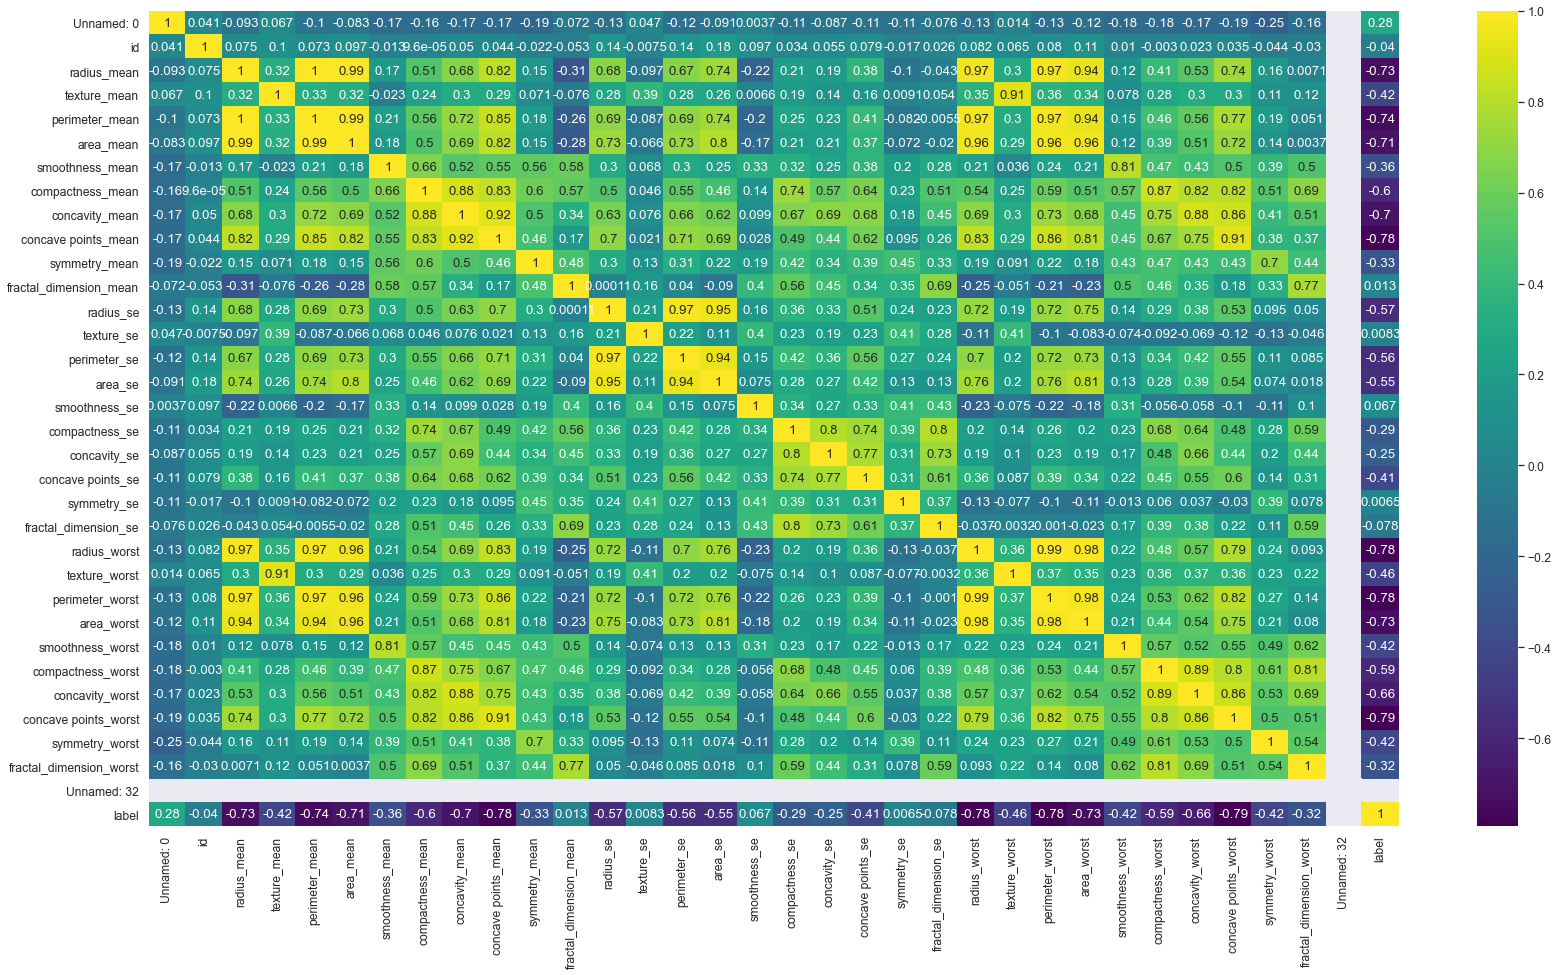

In [ ]:
#The correlation between the features.
plt.figure(figsize=(28,15))
sns.heatmap(df.corr(),annot=True,cmap="viridis");

# Data Preprocessing

In [5]:
#Taking a copy from the dataset
df2=df.copy()

In [6]:
df2.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0


In [7]:
#The features
df2.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32', 'label'],
      dtype='object')

In [8]:
#Dropping the unnamed features
df2.drop(["Unnamed: 0","Unnamed: 32"],axis=1,inplace=True)

In [9]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df2["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

- The two values of the label almost are balanced.

In [11]:
#Splitting the data to x and y
x=df2.drop("label",axis=1)
y=df2["label"]

In [12]:
x.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [14]:
#Removing the diagnosis from x 
x.drop("diagnosis",axis=1,inplace=True)
#Reducing the features
model=DecisionTreeClassifier()
selector=RFE(estimator=model,n_features_to_select=15)
selector.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)

In [15]:
#The selected features
x.columns[selector.support_]

Index(['concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [16]:
x_new=x[x.columns[selector.support_]]
x_new['diagnosis']=df2["diagnosis"]
x_new.head()

,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,smoothness_se,compactness_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,0.14710,0.2419,1.0950,8.589,153.40,0.006399,0.04904,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,M
1,0.07017,0.1812,0.5435,3.398,74.08,0.005225,0.01308,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,M
2,0.12790,0.2069,0.7456,4.585,94.03,0.006150,0.04006,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,M
3,0.10520,0.2597,0.4956,3.445,27.23,0.009110,0.07458,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,M
4,0.10430,0.1809,0.7572,5.438,94.44,0.011490,0.02461,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,M


In [17]:
#Getting the dummies
x_new=pd.get_dummies(x_new,drop_first=True)

In [18]:
x_new.head()

,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,smoothness_se,compactness_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis_M
0,0.14710,0.2419,1.0950,8.589,153.40,0.006399,0.04904,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,1
1,0.07017,0.1812,0.5435,3.398,74.08,0.005225,0.01308,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,1
2,0.12790,0.2069,0.7456,4.585,94.03,0.006150,0.04006,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,1
3,0.10520,0.2597,0.4956,3.445,27.23,0.009110,0.07458,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,1
4,0.10430,0.1809,0.7572,5.438,94.44,0.011490,0.02461,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,1


In [22]:
#Applying standard scaler
scaler = StandardScaler()
scaler.fit(x_new)
x_new = scaler.transform(x_new)

In [23]:
x_new

array([[ 2.53247522e+00,  2.21751501e+00,  2.48973393e+00, ...,
         2.10952635e+00,  2.29607613e+00,  1.29767572e+00],
       [ 5.48144156e-01,  1.39236330e-03,  4.99254601e-01, ...,
        -1.46748968e-01,  1.08708430e+00,  1.29767572e+00],
       [ 2.03723076e+00,  9.39684817e-01,  1.22867595e+00, ...,
         8.54973944e-01,  1.95500035e+00,  1.29767572e+00],
       ...,
       [ 1.05777359e-01, -8.09117071e-01,  1.84892408e-01, ...,
         3.26766604e-01,  4.14068691e-01,  1.29767572e+00],
       [ 2.65886573e+00,  2.13719425e+00,  1.15793543e+00, ...,
         3.19760468e+00,  2.28998549e+00,  1.29767572e+00],
       [-1.26181958e+00, -8.20069901e-01, -7.02787405e-02, ...,
        -1.30583065e+00, -1.74506282e+00, -7.70608548e-01]])

# Building Model

In [19]:
#Applying decision tree classifier
model=DecisionTreeClassifier()

In [24]:
#Applying cross validate
cross_val=cross_validate(model,x_new,y,cv=10,n_jobs=-1,return_train_score=True)

In [25]:
cross_val

{'fit_time': array([0.0033648 , 0.00328016, 0.00262904, 0.0023973 , 0.00258851,
        0.00237536, 0.00248122, 0.00251555, 0.00257826, 0.00263834]),
 'score_time': array([0.00073218, 0.00086212, 0.00059128, 0.00055385, 0.00062871,
        0.00059319, 0.00054145, 0.00062895, 0.00056839, 0.00062776]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [27]:
#Obtaining the predicted values
y_pred=cross_val_predict(model,x_new,y,cv=10,n_jobs=-1)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

- 1 means benign tumor.
- 0 means malignant tumor.

# Evaluating Model Performance

In [31]:
print("Training Score = ",cross_val["train_score"].mean())
print("Testing Score  = ",cross_val["test_score"].mean())

Training Score =  1.0
Testing Score  =  1.0


In [32]:
#Accuracy score
accuracy_score(y,y_pred)

1.0

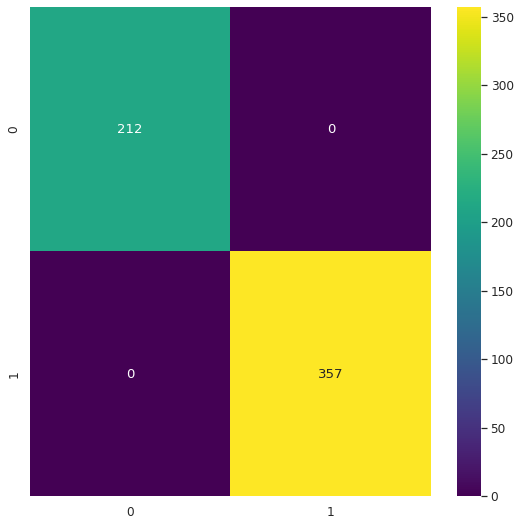

In [45]:
#Confusion matrix
sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap="viridis",fmt='1');

In [47]:
#Classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

